In [4]:
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.datasets import ad_hoc_data

algorithm_globals.random_seed = 12345

In [5]:
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

In [16]:
train_features[:5],train_labels

(array([[2.07345115, 5.84336234],
        [4.0212386 , 4.52389342],
        [1.94778745, 1.69646003],
        [3.95840674, 2.82743339],
        [4.27256601, 5.65486678]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [17]:
print(len(train_features))
print(len(train_labels))
print(len(test_features))
print(len(test_labels))

40
40
10
10


In [23]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel

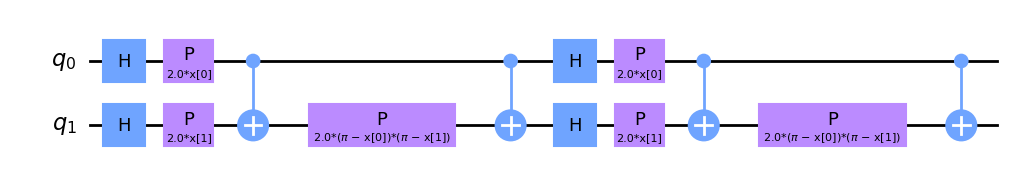

In [22]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
adhoc_feature_map.decompose().draw('mpl')

In [ ]:
# from qiskit.primitives import Sampler
# from qiskit_algorithms.state_fidelities import ComputeUncompute

# sampler = Sampler()
# fidelity = ComputeUncompute(sampler=sampler)

In [24]:
adhoc_kernel = FidelityQuantumKernel(feature_map=adhoc_feature_map)

In [ ]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")